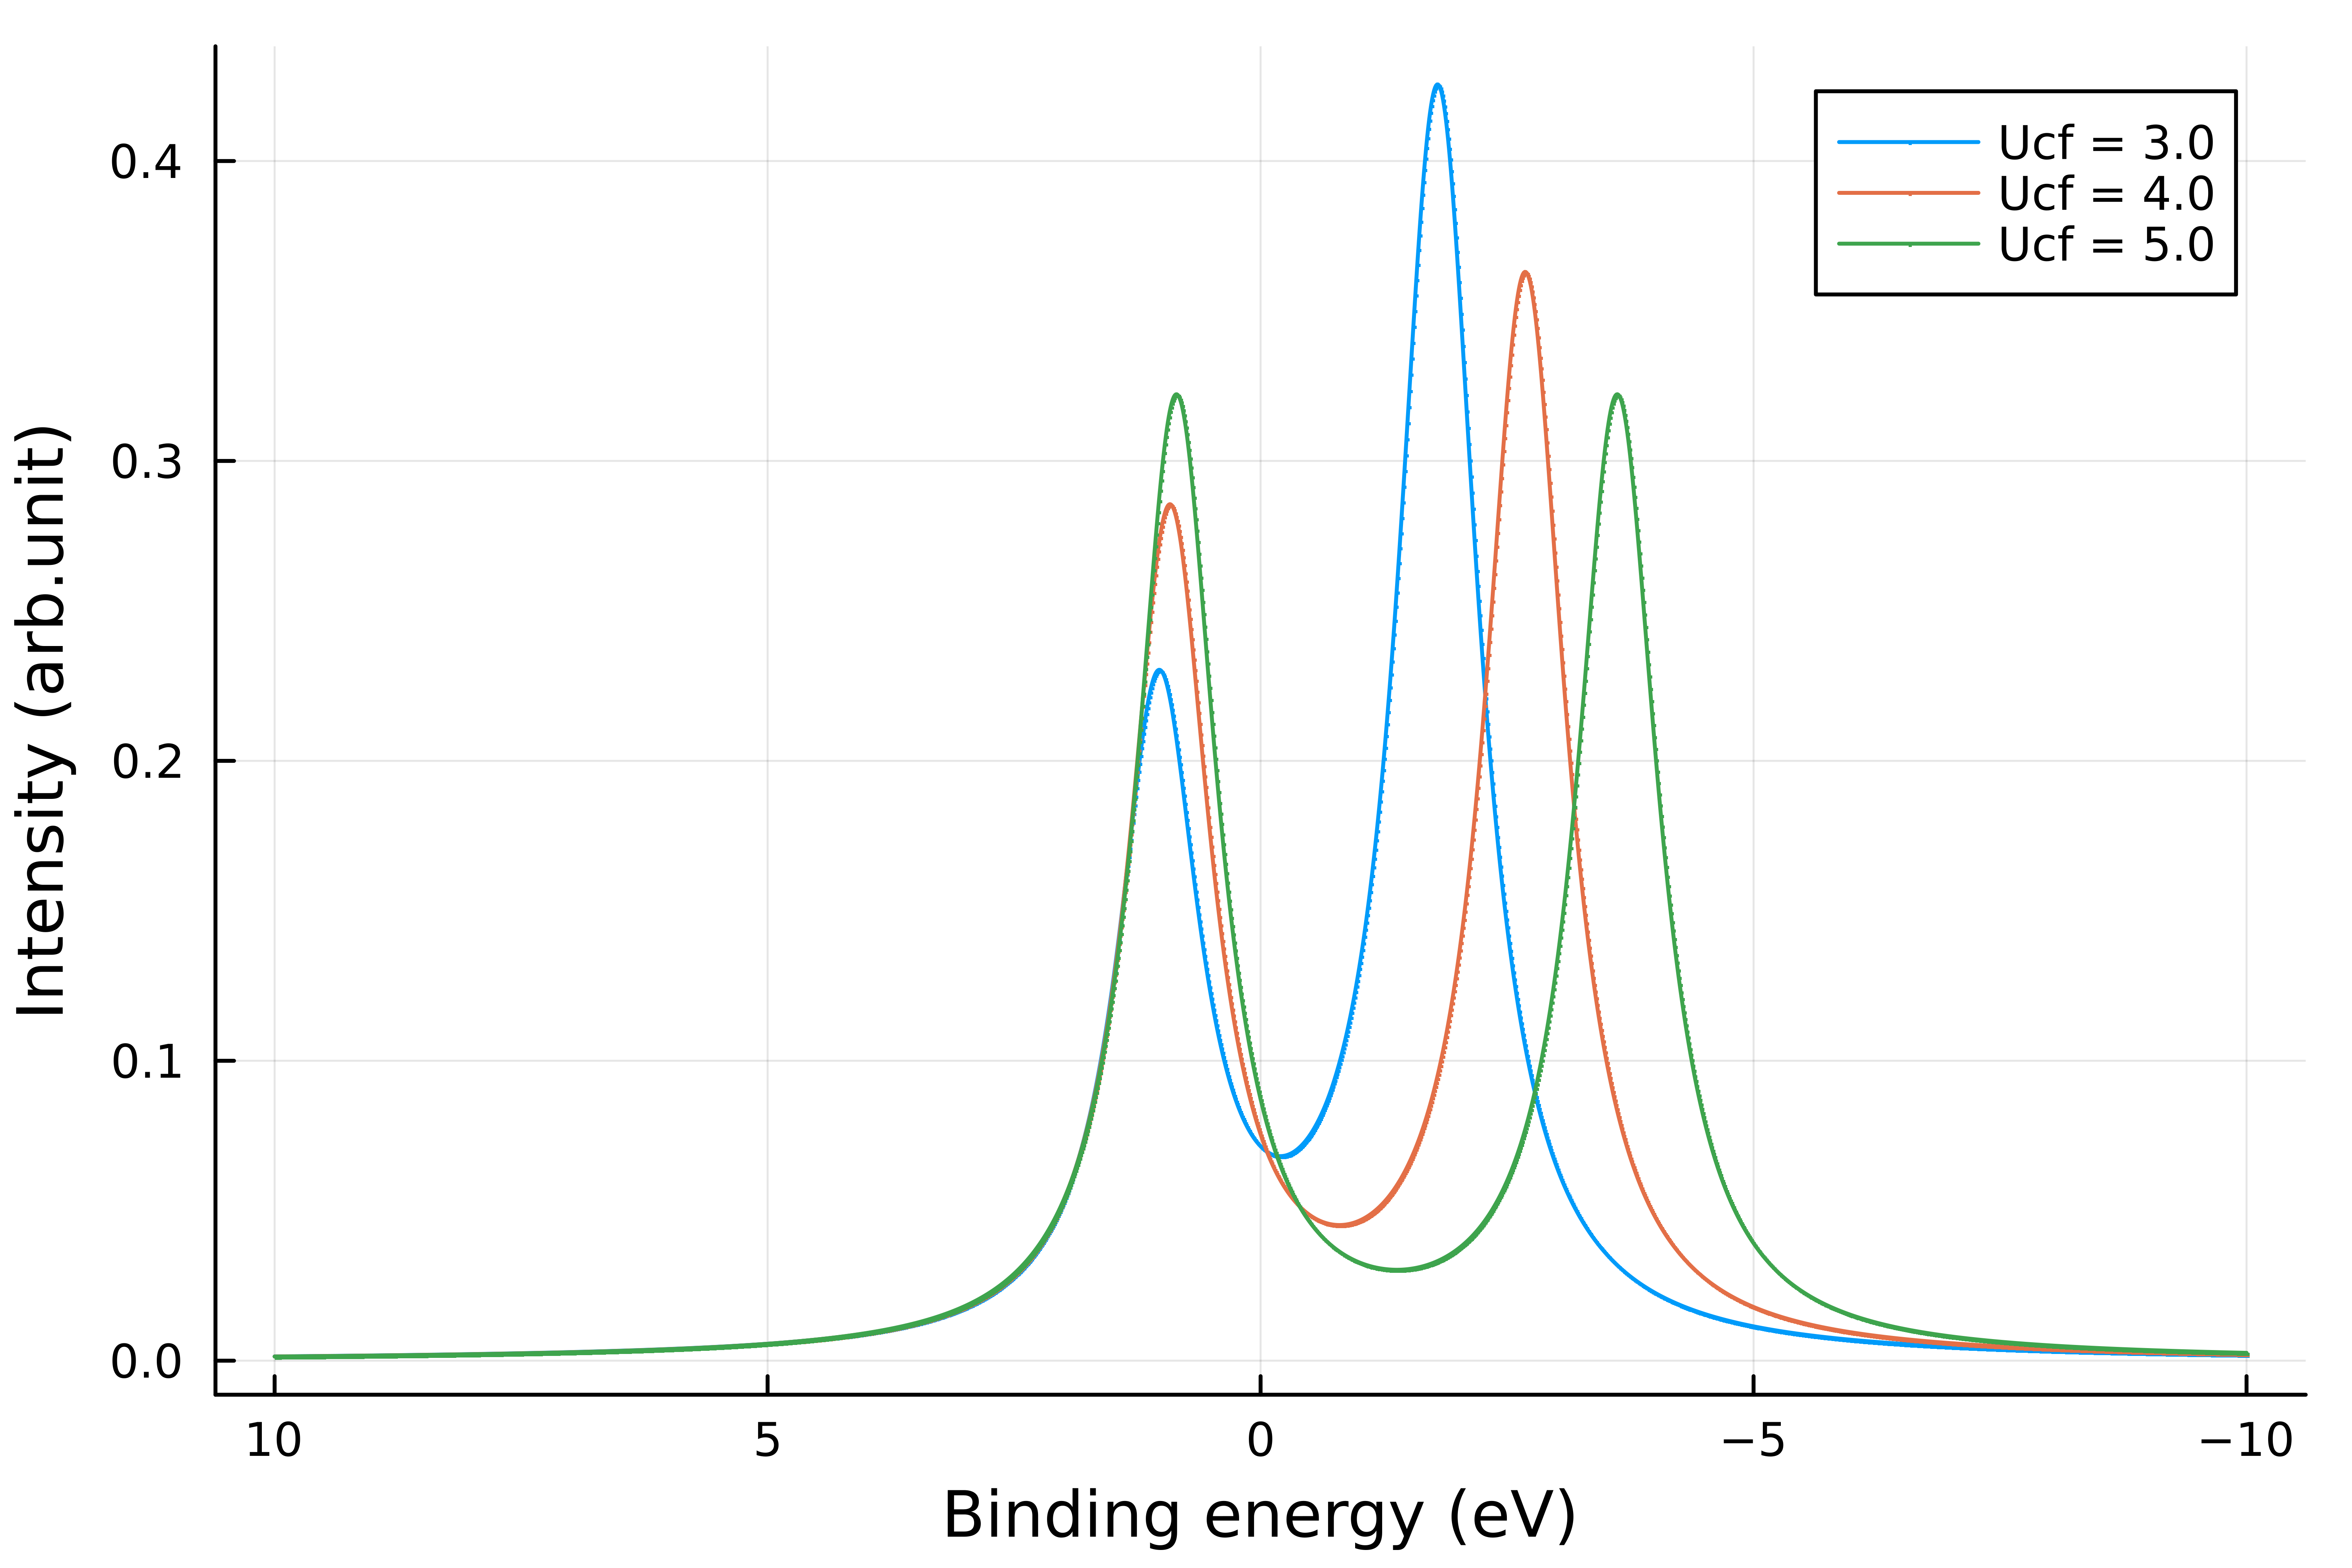

In [293]:
#UGa2
using LinearAlgebra
using Plots
using DelimitedFiles
t =  1
delta = 1 
Ucf_values = [3.0,4.0,5.0] 
smalldelta = 0.5   

p = plot(dpi=1000)

for Ucf in Ucf_values

Hg =  [ 0 t
        t delta ]
Hf =  [ 0 t
        t delta - Ucf  ]

Eg,Vg = eigen(Hg)
Ef,Vf = eigen(Hf)

function F1(Eg,Vg,Ef,Vf,Eb)
   return ((abs(dot(Vg[:,1],Vf[:,1])))^2)/(Eb+Eg-Ef+im*smalldelta)
end
function F2(Eg,Vg,Ef,Vf,Eb)
   return ((abs(dot(Vg[:,1],Vf[:,2])))^2)/(Eb+Eg-Ef+im*smalldelta)
end

data = []

for Eb in -10:0.01:10
    ints = (-1 / π) * imag(F1(Eg[1], Vg, Ef[1], Vf, Eb) + F2(Eg[1], Vg, Ef[2], Vf, Eb))
    push!(data, [Eb, ints])
end

data = hcat(data...)
x = data[1, :]
y = data[2, :]

plot!(p, x, y, xlabel="Binding energy (eV)", ylabel="Intensity (arb.unit)", label="Ucf = $Ucf", marker=:auto, markersize=0 ) #ylims=(0, 1))

end

xflip!()

In [294]:
alpha2 = (Vg[1])^2
beta2 = (Vg[2])^2

@show alpha2 , beta2

(alpha2, beta2) = (0.7236067977499788, 0.2763932022500209)

(0.7236067977499788, 0.2763932022500209)

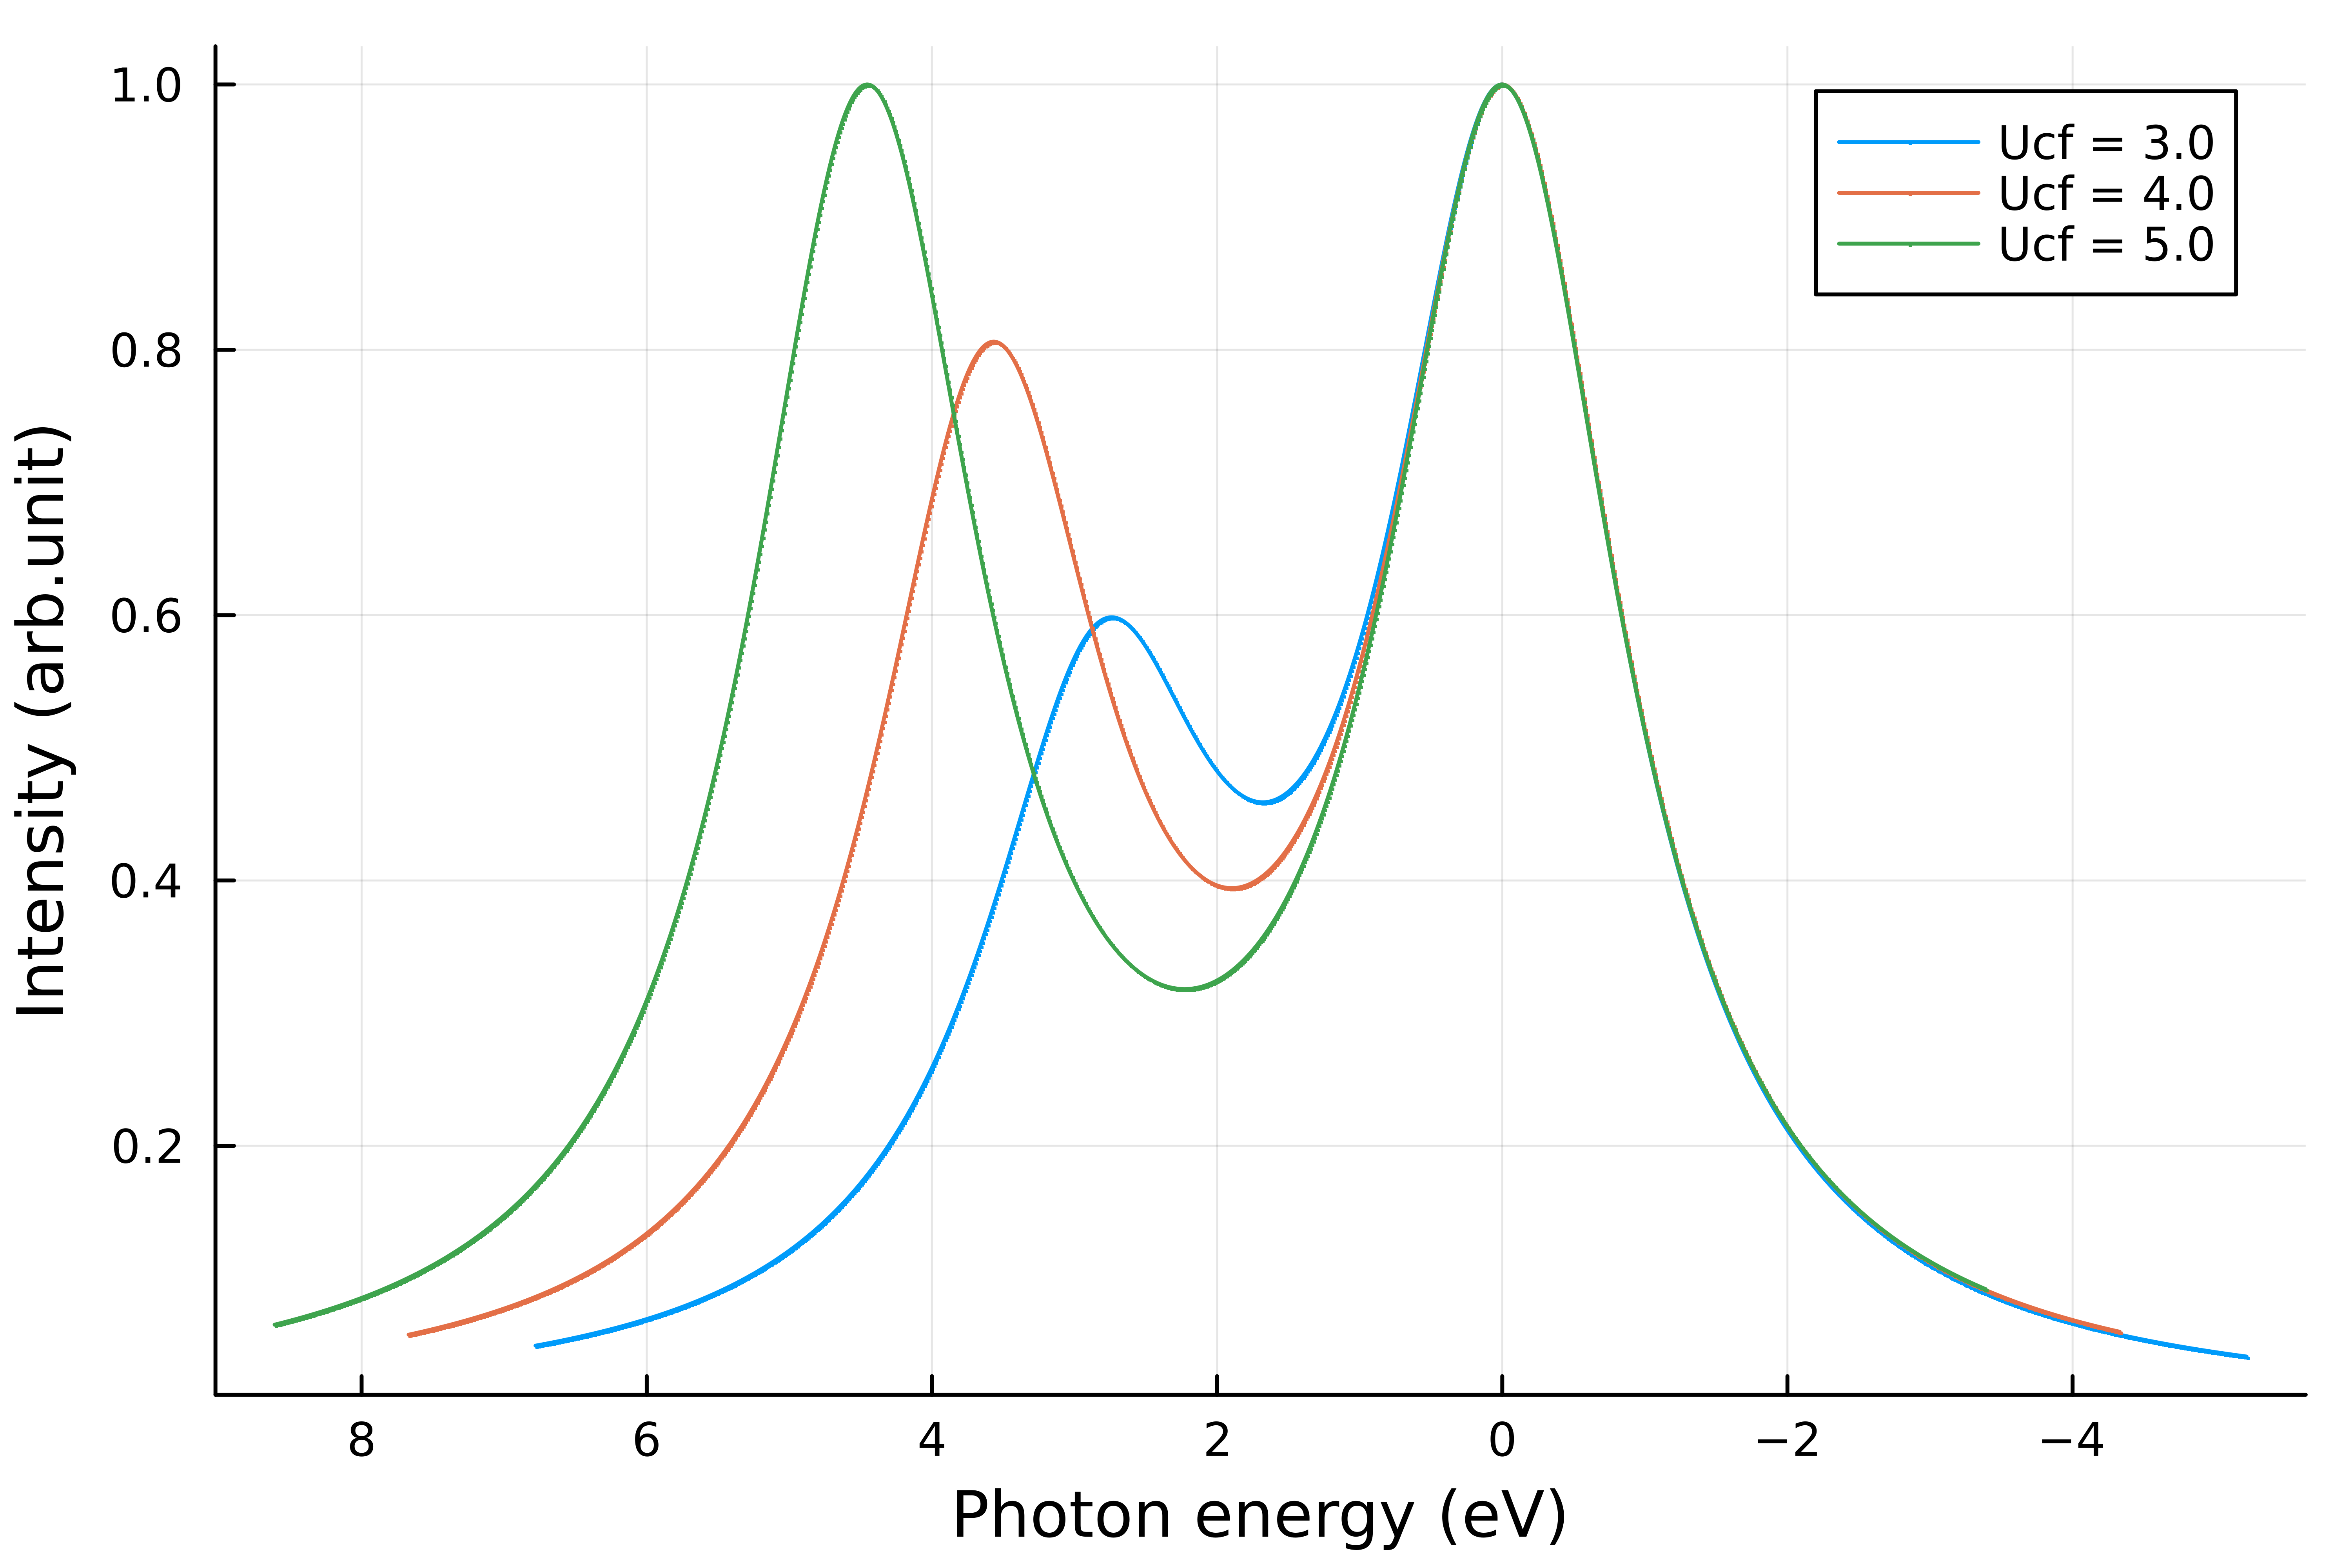

In [295]:
#UGa2
using LinearAlgebra
using Plots
using DelimitedFiles
#t =  1.2
#delta = 1  
Ucf_values = [3.0,4.0,5.0] 
smalldelta = 1   

p = plot(dpi=1000)

for Ucf in Ucf_values

Hg =  [ 0 t
        t delta ]
Hf =  [ 0 t
        t delta - Ucf  ]

Eg,Vg = eigen(Hg)
Ef,Vf = eigen(Hf)

function F1(Eg,Vg,Ef,Vf,Eb)
   return ((abs(dot(Vg[:,1],Vf[:,1])))^2)/(Eb+Eg-Ef+im*smalldelta)
end
function F2(Eg,Vg,Ef,Vf,Eb)
   return ((abs(dot(Vg[:,1],Vf[:,2])))^2)/(Eb+Eg-Ef+im*smalldelta)
end

data = []

for Eb in -7:0.01:5
    ints = (-1 / π) * imag(F1(Eg[1], Vg, Ef[1], Vf, Eb) + F2(Eg[1], Vg, Ef[2], Vf, Eb))
    push!(data, [Eb, ints])
end

data = hcat(data...)
    x = data[1, :]
    y = data[2, :]

    # yの最大値とその位置を取得
    ymax = maximum(y)
    xmax = x[argmax(y)]

    # xを最大値の位置を原点にずらしてプロット
    x_shifted = x .- xmax

    # yのピークでの値が1になるように倍率を計算
    scale_factor = 1 / ymax

    # yを倍率でスケーリング
    y_scaled = y * scale_factor

    plot!(p, x_shifted, y_scaled, xlabel="Photon energy (eV)", ylabel="Intensity (arb.unit)", label="Ucf = $Ucf", marker=:auto, markersize=0)
end

xflip!()

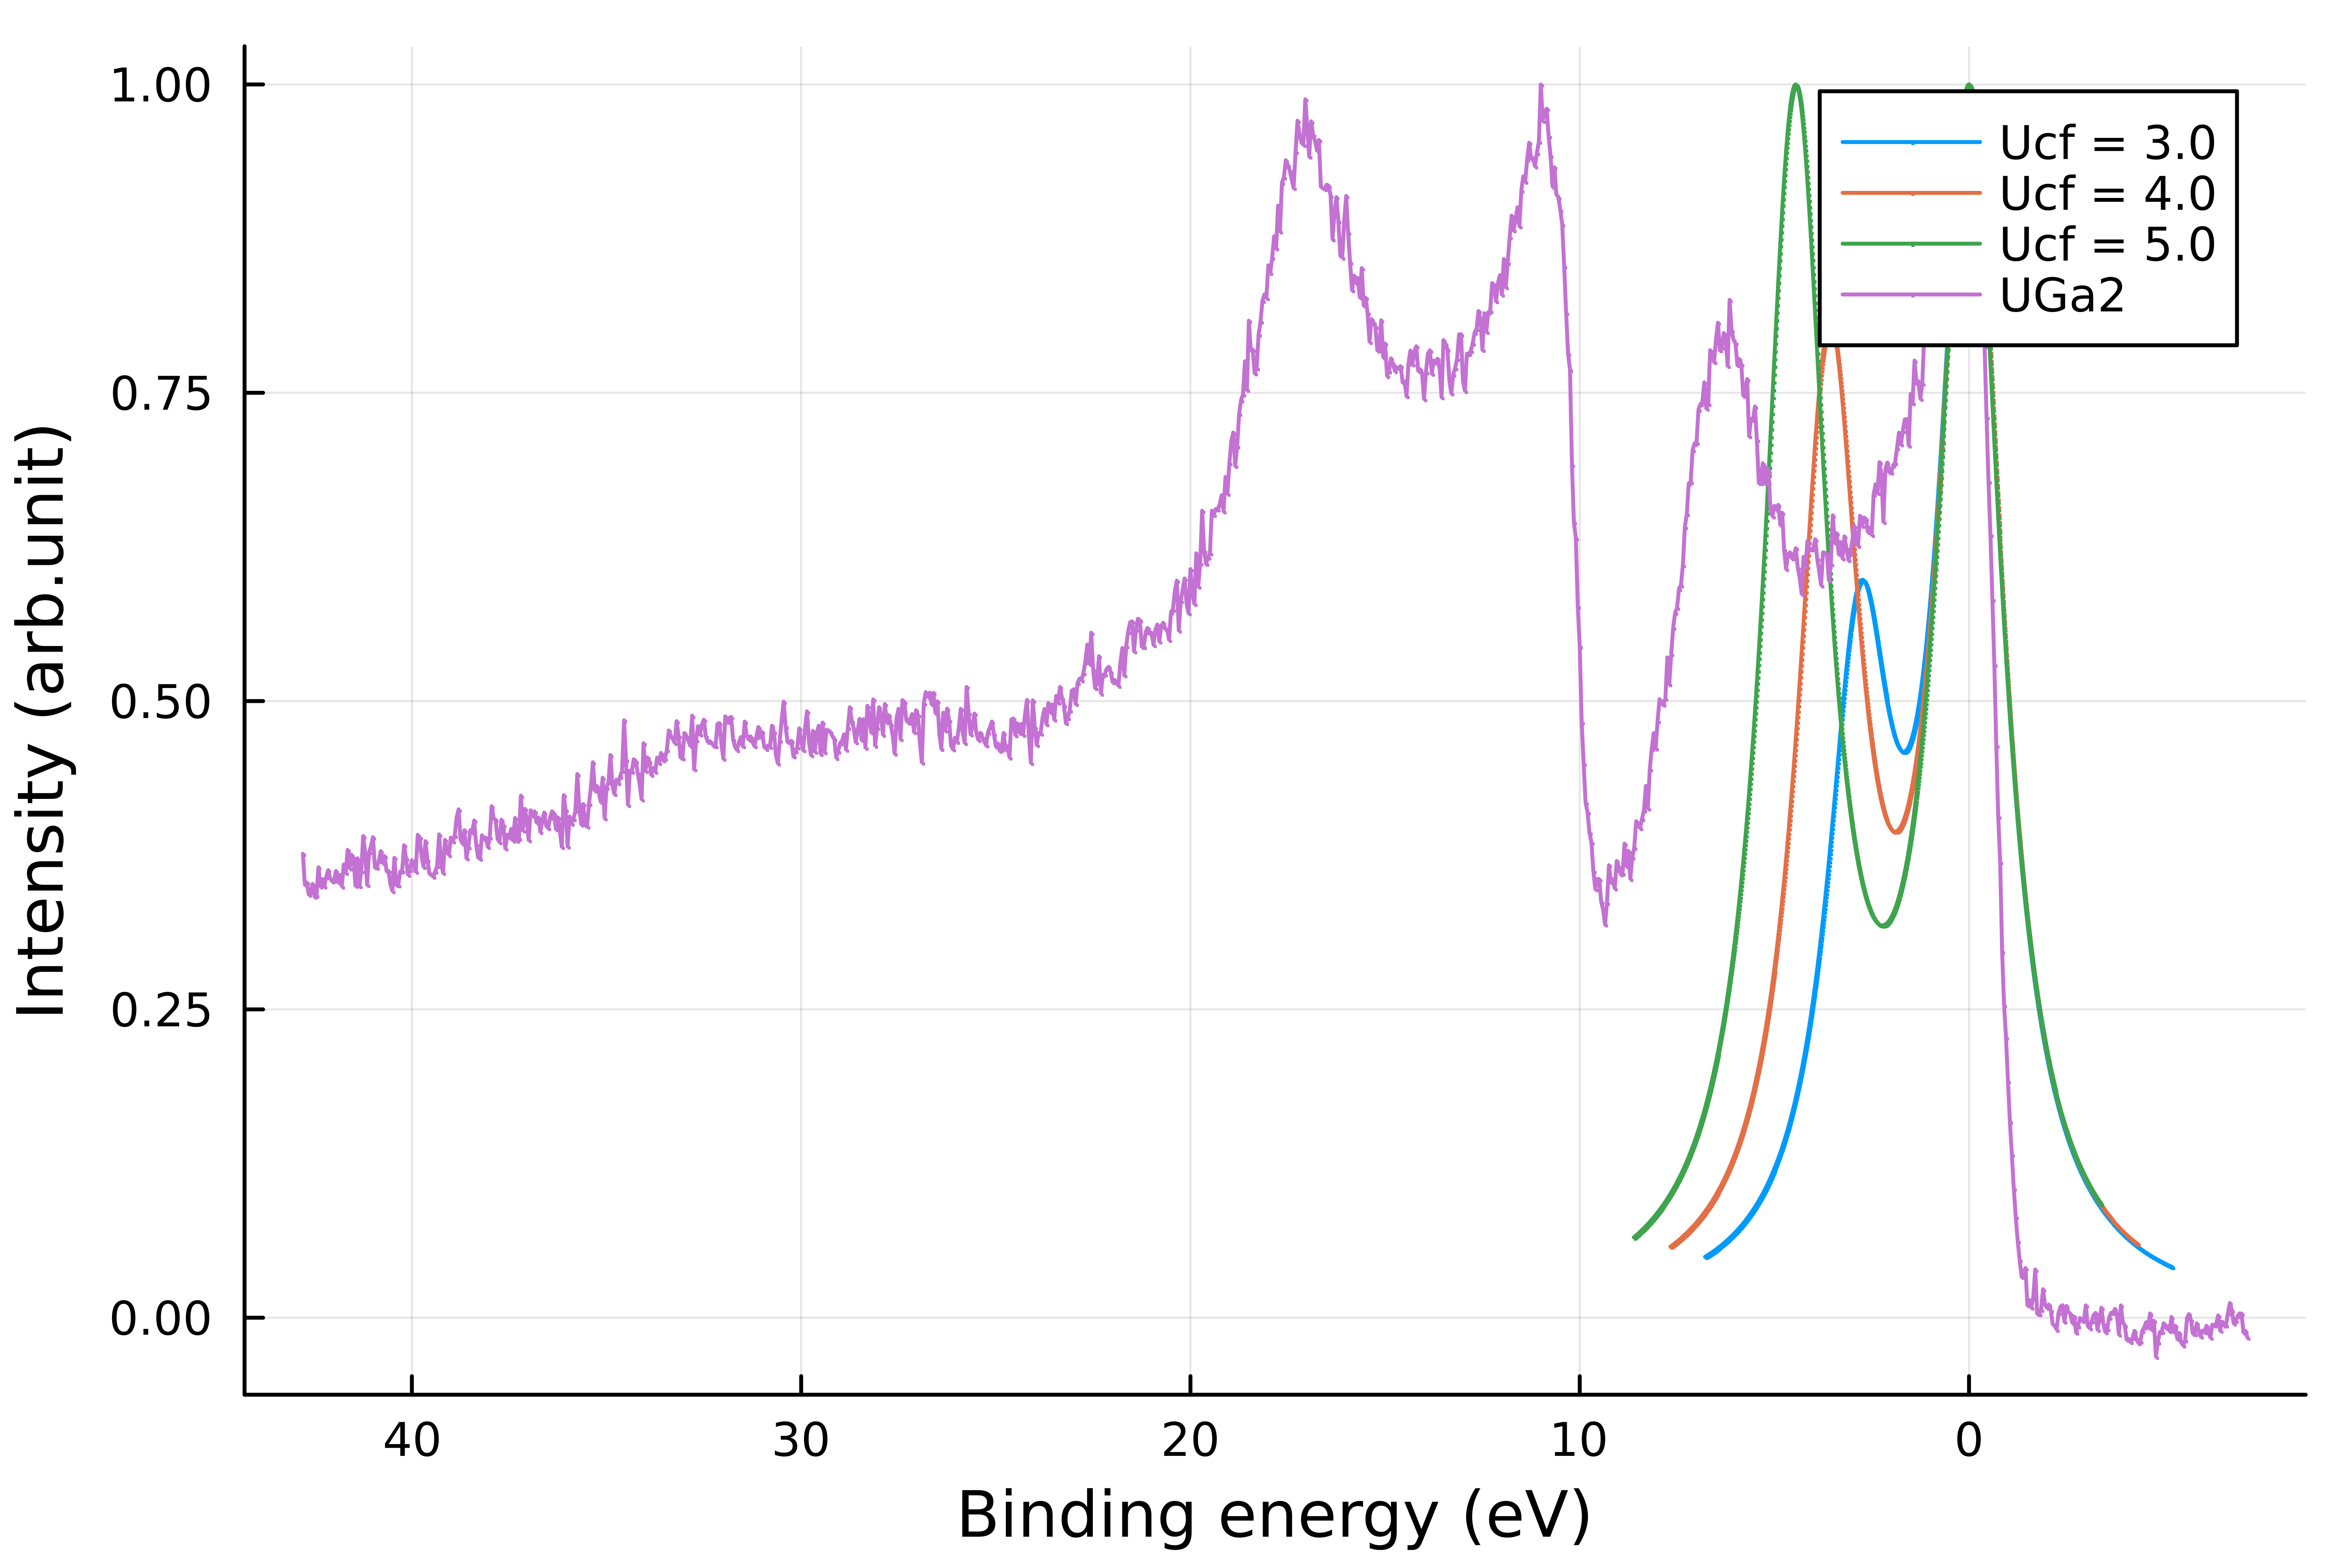

In [296]:
# "UGa2.dat"のデータを読み込む（区切り文字は空白文字、全ての列をFloat64型として読み込む）
data_UGa2 = readdlm("UGa2.dat", '\t', Float64)

# データを x_UGa2 と y_UGa2 に分割
x_UGa2 = data_UGa2[:, 1]
y_UGa2 = data_UGa2[:, 2]

# yのピークでの値が1になるように倍率を計算
scale_factor_UGa2 = 1 / maximum(y_UGa2)

# yを倍率でスケーリング
y_scaled_UGa2 = y_UGa2 * scale_factor_UGa2

# yの最大値とその位置を取得
ymax_UGa2 = maximum(y_scaled_UGa2)
xmax_UGa2 = x_UGa2[argmax(y_scaled_UGa2)]

# xを最大値の位置をx=10にずらしてプロット
x_shifted_UGa2 = x_UGa2 .- xmax_UGa2 .+ 11
# yのピークの値が1に揃えるための倍率を計算
scale_factor_peaks = 1 / maximum(y_UGa2)
y_scaled_peaks = y_UGa2 .* scale_factor_peaks

plot!(p,x_shifted_UGa2 , y_scaled_UGa2, xlabel="Binding energy (eV)", ylabel="Intensity (arb.unit)", label="UGa2", marker=:auto, markersize=0)

xflip!()

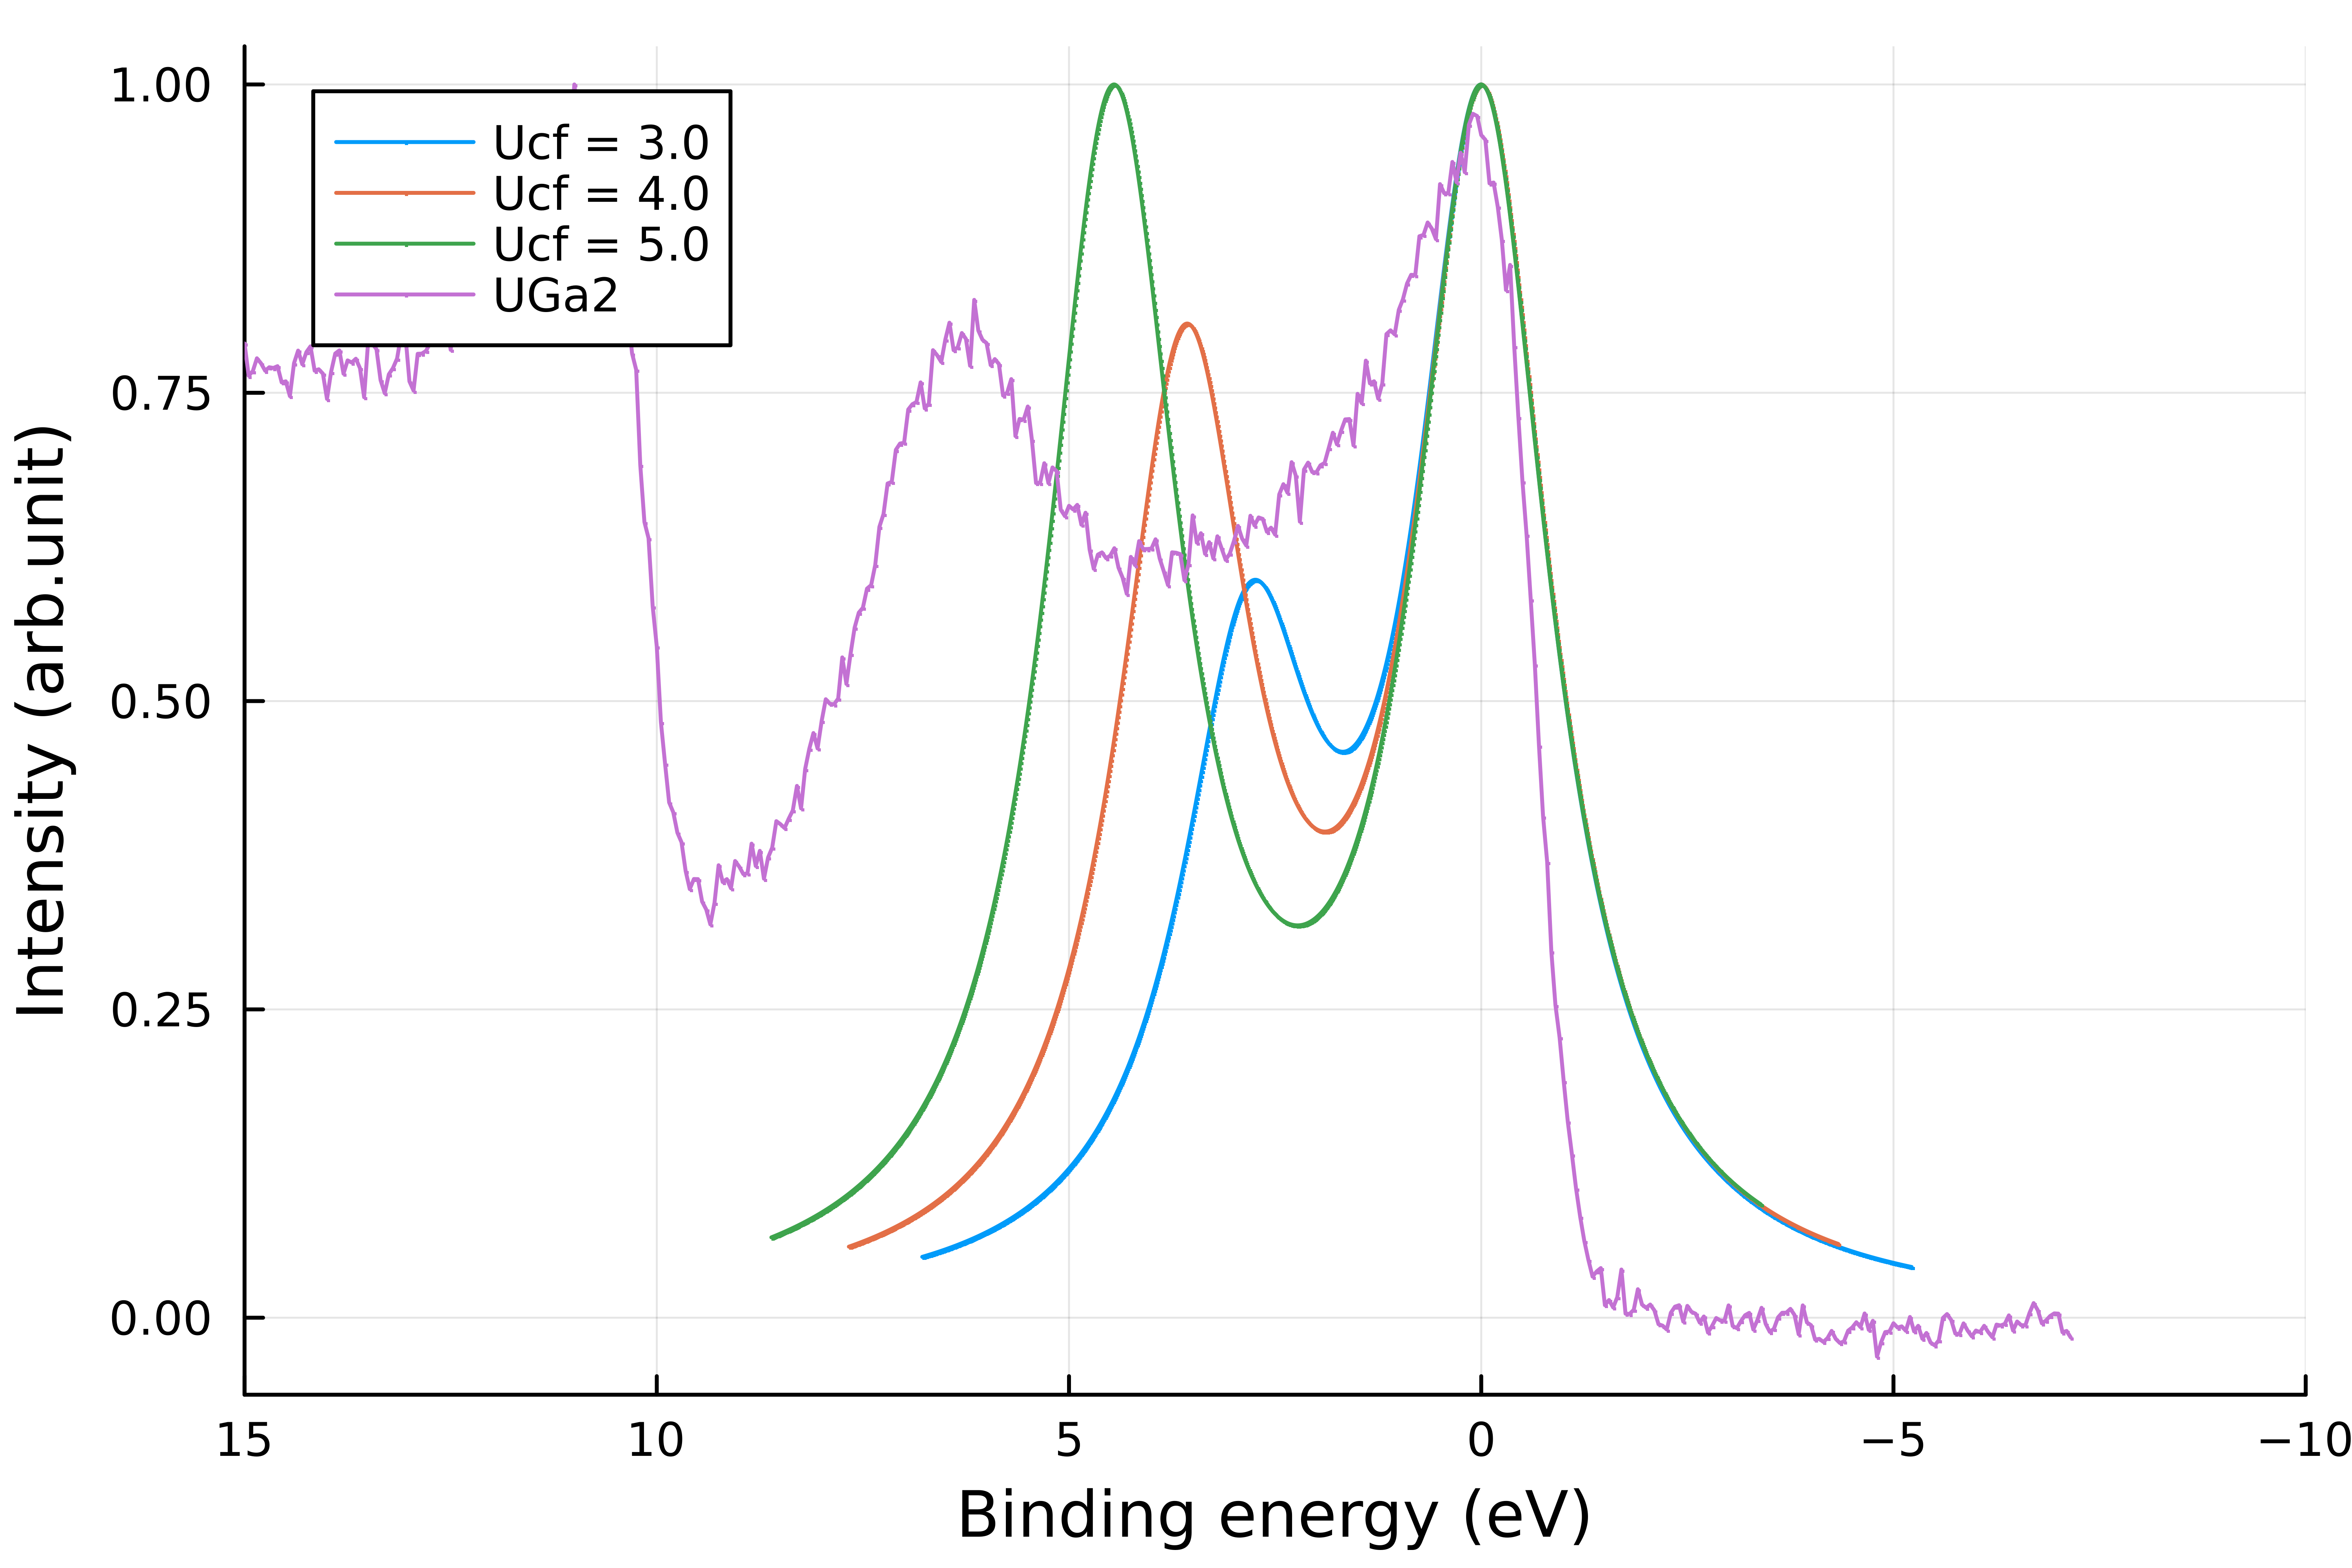

In [297]:
xlims!(p,-10,15)

In [298]:
savefig("xps.png")

"/Users/andrew/Desktop/shinaoka_workspace/Two-level-model/UGa2/xps.png"